<a href="https://colab.research.google.com/github/pythonpdnp/DL/blob/main/ANN_nHiddenUnits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

### 데이터 전처리

In [16]:
import seaborn as sns

iris = sns.load_dataset('iris')                               # iris는 pandas dataframe 형태

data = torch.tensor( iris.iloc[:, :-1].values ).float()      # feature space를 tensor형태로 변환
                                                             # iris.values[:, :-1]는 object형태라 텐서 변환이 힘듬
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1                     # setosa는 어차피 0이니까
labels[iris.species == 'virginica']  = 2

### 신경망 셋팅 및 학습

In [17]:
def ANNiris(nHidden, numEpochs=1000):

  # 모형 셋팅
  ANNclf = nn.Sequential(
      nn.Linear(4, nHidden),
      nn.ReLU(),
      nn.Linear(nHidden, nHidden),
      nn.ReLU(),
      nn.Linear(nHidden, 3)
      # nn.Softmax(dim=1)               # final activation unit(cross entropy loss 에서는 생략가능)
      )

  lossfn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNclf.parameters(), lr=0.01)

  # 학습
  losses = torch.zeros(numEpochs)

  for epoch in range(numEpochs):
    yhat = ANNclf(data)
    loss = lossfn(yhat, labels)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  pred = ANNclf(data)
  predLabels = torch.argmax(pred, axis=1)
  acc = torch.mean((predLabels==labels).float())*100

  return ANNclf, losses, acc

In [31]:
numHiddens = np.arange(1, 129)
accs = torch.zeros(len(numHiddens))

for i in range(len(numHiddens)):
  _, _, accs[i] = ANNiris(numHiddens[i], 150)

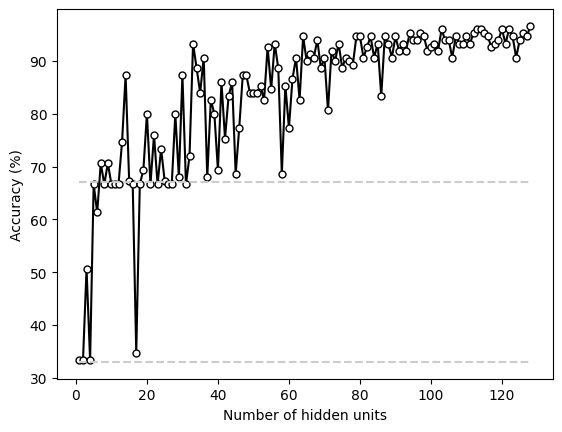

In [33]:
plt.plot(numHiddens, accs.detach(), 'ko-', mfc='w', ms=5)
plt.plot(numHiddens[[0,-1]], [33,33], '--', color=[0.8,0.8,0.8])
plt.plot(numHiddens[[0,-1]], [67,67], '--', color=[0.8,0.8,0.8])
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy (%)')
plt.show()